In [250]:
import pandas as pd
import missingno as msno

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [189]:
hum = pd.read_csv('Z:/공모전/날씨빅데이터콘테스트(공유)/data/edited_data/forecast_humidity_0729.csv', encoding='cp949')
temp = pd.read_csv('Z:/공모전/날씨빅데이터콘테스트(공유)/data/edited_data/forecast_temperature_0729.csv', encoding='cp949')
temp

,avg_temp,area,tma,max_temp,min_temp
0,-2.344048,강원,2012-01-01,5.0,-7.3
1,-3.010000,경기,2012-01-01,1.0,-6.9
2,1.642857,경남,2012-01-01,7.0,-2.9
3,0.075556,경북,2012-01-01,6.1,-5.9
4,0.383333,광주,2012-01-01,3.0,-0.9
...,...,...,...,...,...
30220,2.666684,전남,2016-12-31,9.0,-4.7
30221,1.019392,전북,2016-12-31,7.5,-7.0
30222,7.058615,제주,2016-12-31,10.5,2.5
30223,1.146847,충남,2016-12-31,7.7,-4.0


In [190]:
area_name = [
'서울',
'부산',
'대구',
'인천',
'광주',
'대전',
'울산',
'세종',
'경기',
'강원',
'충북',
'충남',
'전북',
'전남',
'경북',
'경남',
'제주',
]

In [191]:
hum_df = pd.DataFrame(columns=['area','tma','min_humidity','max_humidity','avg_humidity'])
for area in area_name:
    hum2 = hum[hum['area']==area]
    hum2['tma'] = pd.to_datetime(hum2['tma'])
    head_range = pd.date_range(start='2012-01-01', end='2016-12-31')
    hum2.index = hum2['tma']
    hum3 = hum2.reindex(head_range, fill_value=None)
    hum3['tma'] = hum3.index
    hum3.reset_index(drop=True, inplace=True)
    hum3.insert(2, 'yyyy', hum3.tma.dt.year)
    hum3.insert(3, 'mm',   hum3.tma.dt.month)
    hum3.insert(4, 'dd',   hum3.tma.dt.day)
    hum3['area'] = area
    hum_df = pd.concat([hum_df, hum3], axis=0)

hum_df.sort_values(['tma', 'area'], inplace=True)
hum_df.reset_index(drop=True, inplace=True)
hum_df['tma'] = pd.to_datetime(hum_df['tma'])
hum_df

C:\Users\dltmf\AppData\Local\Temp\ipykernel_39020\815631091.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hum2['tma'] = pd.to_datetime(hum2['tma'])
C:\Users\dltmf\AppData\Local\Temp\ipykernel_39020\815631091.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hum2['tma'] = pd.to_datetime(hum2['tma'])
C:\Users\dltmf\AppData\Local\Temp\ipykernel_39020\815631091.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,area,tma,min_humidity,max_humidity,avg_humidity,yyyy,mm,dd
0,강원,2012-01-01,30.0,95.0,58.333333,2012.0,1.0,1.0
1,경기,2012-01-01,38.0,65.0,50.733333,2012.0,1.0,1.0
2,경남,2012-01-01,31.0,78.0,44.916667,2012.0,1.0,1.0
3,경북,2012-01-01,20.0,90.0,52.377778,2012.0,1.0,1.0
4,광주,2012-01-01,70.0,85.0,75.833333,2012.0,1.0,1.0
...,...,...,...,...,...,...,...,...
31054,전남,2016-12-31,40.0,89.0,65.555094,2016.0,12.0,31.0
31055,전북,2016-12-31,45.0,87.0,72.161486,2016.0,12.0,31.0
31056,제주,2016-12-31,45.0,76.0,60.569257,2016.0,12.0,31.0
31057,충남,2016-12-31,54.0,95.0,75.118243,2016.0,12.0,31.0


In [192]:
hum_df.isnull().sum()

area               0
tma                0
min_humidity    1188
max_humidity    1188
avg_humidity    1188
yyyy               0
mm                 0
dd                 0
dtype: int64

In [194]:
temp_df = pd.DataFrame(columns=['area','tma','min_temp','max_temp','avg_temp'])
for area in area_name:
    temp2 = temp[temp['area']==area]
    temp2['tma'] = pd.to_datetime(temp2['tma'])
    head_range = pd.date_range(start='2012-01-01', end='2016-12-31')
    temp2.index = temp2['tma']
    temp3 = temp2.reindex(head_range, fill_value=None)
    temp3['tma'] = temp3.index
    temp3.reset_index(drop=True, inplace=True)
    temp3.insert(2, 'yyyy', temp3.tma.dt.year)
    temp3.insert(3, 'mm',   temp3.tma.dt.month)
    temp3.insert(4, 'dd',   temp3.tma.dt.day)
    temp3['area'] = area
    temp_df = pd.concat([temp_df, temp3], axis=0)

temp_df.sort_values(['tma', 'area'], inplace=True)
temp_df.reset_index(drop=True, inplace=True)
temp_df['tma'] = pd.to_datetime(temp_df['tma'])
temp_df

C:\Users\dltmf\AppData\Local\Temp\ipykernel_39020\3177306142.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['tma'] = pd.to_datetime(temp2['tma'])
C:\Users\dltmf\AppData\Local\Temp\ipykernel_39020\3177306142.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['tma'] = pd.to_datetime(temp2['tma'])
C:\Users\dltmf\AppData\Local\Temp\ipykernel_39020\3177306142.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,area,tma,min_temp,max_temp,avg_temp,yyyy,mm,dd
0,강원,2012-01-01,-7.3,5.0,-2.344048,2012.0,1.0,1.0
1,경기,2012-01-01,-6.9,1.0,-3.010000,2012.0,1.0,1.0
2,경남,2012-01-01,-2.9,7.0,1.642857,2012.0,1.0,1.0
3,경북,2012-01-01,-5.9,6.1,0.075556,2012.0,1.0,1.0
4,광주,2012-01-01,-0.9,3.0,0.383333,2012.0,1.0,1.0
...,...,...,...,...,...,...,...,...
31054,전남,2016-12-31,-4.7,9.0,2.666684,2016.0,12.0,31.0
31055,전북,2016-12-31,-7.0,7.5,1.019392,2016.0,12.0,31.0
31056,제주,2016-12-31,2.5,10.5,7.058615,2016.0,12.0,31.0
31057,충남,2016-12-31,-4.0,7.7,1.146847,2016.0,12.0,31.0


In [195]:
temp_df.isnull().sum()

area          0
tma           0
min_temp    834
max_temp    834
avg_temp    834
yyyy          0
mm            0
dd            0
dtype: int64

## 결측치 처리 (습도)

- 2012년 : 데이터 기존꺼랑 비교해서 null 값 대체(대구)
- 2012년 나머지 + 2015, 2016년 : 해당 일자의 전국 평균(예보데이터)으로 대체
- else : 관측데이터

In [197]:
hum_df[hum_df.min_humidity.isnull()].yyyy.unique()

array([2012., 2015., 2016.])

In [201]:
hum_origin = pd.read_csv('Z:/공모전/날씨빅데이터콘테스트(공유)/data/edited_data/forecast_humidity.csv', encoding='cp949')
hum_origin.drop('Unnamed: 0', axis=1, inplace=True)
hum_origin.tma = pd.to_datetime(hum_origin.tma)
hum_origin = hum_origin[['area', 'tma', 'avg_humidity', 'min_humidity', 'max_humidity']]
hum_origin

,area,tma,avg_humidity,min_humidity,max_humidity
0,강원,2012-01-01,58.333333,30.0,95.0
1,경기,2012-01-01,50.733333,38.0,65.0
2,경남,2012-01-01,44.916667,31.0,78.0
3,경북,2012-01-01,52.377778,20.0,90.0
4,광주,2012-01-01,75.833333,70.0,85.0
...,...,...,...,...,...
23727,전남,2015-12-31,66.764033,30.0,95.0
23728,전북,2015-12-31,73.750000,45.0,95.0
23729,제주,2015-12-31,59.915541,45.0,78.0
23730,충남,2015-12-31,74.725225,40.0,95.0


In [202]:
# hum_origin 우선 merge 후 null값 판단 (기존 데이터 notnull + 새로운 데이터 null)
tmp_hum = pd.merge(hum_df, hum_origin, how = 'left', on = ['area', 'tma'])
tmp_hum.loc[(tmp_hum.min_humidity_x.isnull()) & ~(tmp_hum.min_humidity_y.isnull()), 'min_humidity_x'] = tmp_hum.loc[(tmp_hum.min_humidity_x.isnull()) & ~(tmp_hum.min_humidity_y.isnull()), 'min_humidity_y']
tmp_hum.loc[(tmp_hum.avg_humidity_x.isnull()) & ~(tmp_hum.avg_humidity_y.isnull()), 'avg_humidity_x'] = tmp_hum.loc[(tmp_hum.avg_humidity_x.isnull()) & ~(tmp_hum.avg_humidity_y.isnull()), 'avg_humidity_y']
tmp_hum.loc[(tmp_hum.max_humidity_x.isnull()) & ~(tmp_hum.max_humidity_y.isnull()), 'max_humidity_x'] = tmp_hum.loc[(tmp_hum.max_humidity_x.isnull()) & ~(tmp_hum.max_humidity_y.isnull()), 'max_humidity_y']

tmp_hum[tmp_hum.yyyy == 2012].isnull().sum()

area                0
tma                 0
min_humidity_x    399
max_humidity_x    399
avg_humidity_x    399
yyyy                0
mm                  0
dd                  0
avg_humidity_y    986
min_humidity_y    986
max_humidity_y    986
dtype: int64

In [203]:
tmp_hum[['area','tma','min_humidity_x','max_humidity_x','avg_humidity_x']].isnull().sum()

area                0
tma                 0
min_humidity_x    880
max_humidity_x    880
avg_humidity_x    880
dtype: int64

In [204]:
tmp_hum = tmp_hum[['area','tma','yyyy','mm','dd', 'min_humidity_x','max_humidity_x','avg_humidity_x']]
tmp_hum.rename(columns = {'min_humidity_x' : 'min_hum',
                          'max_humidity_x' :'max_hum',
                          'avg_humidity_x' :'avg_hum'}, inplace=True)

In [206]:
subset_hum = tmp_hum.groupby('tma', as_index=False).mean()
subset_hum[subset_hum.min_hum.isnull()]   # 일평균 값 자체의 null 값 존재

,tma,yyyy,mm,dd,min_hum,max_hum,avg_hum
315,2012-11-11,2012.0,11.0,11.0,NaN,NaN,NaN
316,2012-11-12,2012.0,11.0,12.0,NaN,NaN,NaN
317,2012-11-13,2012.0,11.0,13.0,NaN,NaN,NaN
318,2012-11-14,2012.0,11.0,14.0,NaN,NaN,NaN
319,2012-11-15,2012.0,11.0,15.0,NaN,NaN,NaN
320,2012-11-16,2012.0,11.0,16.0,NaN,NaN,NaN
321,2012-11-17,2012.0,11.0,17.0,NaN,NaN,NaN
322,2012-11-18,2012.0,11.0,18.0,NaN,NaN,NaN
323,2012-11-19,2012.0,11.0,19.0,NaN,NaN,NaN
324,2012-11-20,2012.0,11.0,20.0,NaN,NaN,NaN


In [207]:
null_idx = tmp_hum[tmp_hum.min_hum.isnull()].index
for idx in null_idx :
    tmp_hum.loc[idx, 'min_hum'] = subset_hum.loc[subset_hum.tma == tmp_hum.loc[idx, 'tma'], 'min_hum'].values[0]
    tmp_hum.loc[idx, 'max_hum'] = subset_hum.loc[subset_hum.tma == tmp_hum.loc[idx, 'tma'], 'max_hum'].values[0]
    tmp_hum.loc[idx, 'avg_hum'] = subset_hum.loc[subset_hum.tma == tmp_hum.loc[idx, 'tma'], 'avg_hum'].values[0]

In [208]:
tmp_hum[tmp_hum.min_hum.isnull()]

,area,tma,yyyy,mm,dd,min_hum,max_hum,avg_hum
5355,강원,2012-11-11,2012.0,11.0,11.0,NaN,NaN,NaN
5356,경기,2012-11-11,2012.0,11.0,11.0,NaN,NaN,NaN
5357,경남,2012-11-11,2012.0,11.0,11.0,NaN,NaN,NaN
5358,경북,2012-11-11,2012.0,11.0,11.0,NaN,NaN,NaN
5359,광주,2012-11-11,2012.0,11.0,11.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
21194,전남,2015-05-31,2015.0,5.0,31.0,NaN,NaN,NaN
21195,전북,2015-05-31,2015.0,5.0,31.0,NaN,NaN,NaN
21196,제주,2015-05-31,2015.0,5.0,31.0,NaN,NaN,NaN
21197,충남,2015-05-31,2015.0,5.0,31.0,NaN,NaN,NaN


In [209]:
hum_0725 = pd.read_csv('Z:/공모전/날씨빅데이터콘테스트(공유)/data/edited_data/humidity_edited_0725.csv', encoding='cp949')
hum_0725.tma = pd.to_datetime(hum_0725.tma)
hum_0725

,area,tma,avg_rhm,min_rhm
0,강원,2011-12-01,83.354839,66.685294
1,강원,2011-12-02,86.000000,68.320588
2,강원,2011-12-03,95.000000,80.205882
3,강원,2011-12-04,72.117647,43.800000
4,강원,2011-12-05,71.088235,34.414706
...,...,...,...,...
31581,충북,2016-12-27,72.200000,40.610000
31582,충북,2016-12-28,71.400000,35.845000
31583,충북,2016-12-29,65.500000,30.250000
31584,충북,2016-12-30,73.450000,39.460000


In [210]:
hum_0725['max_rhm'] = hum_0725.avg_rhm * 2 - hum_0725.min_rhm
hum_0725.loc[hum_0725['max_rhm'] > 100, 'max_rhm'] = 100
hum_0725

,area,tma,avg_rhm,min_rhm,max_rhm
0,강원,2011-12-01,83.354839,66.685294,100.0
1,강원,2011-12-02,86.000000,68.320588,100.0
2,강원,2011-12-03,95.000000,80.205882,100.0
3,강원,2011-12-04,72.117647,43.800000,100.0
4,강원,2011-12-05,71.088235,34.414706,100.0
...,...,...,...,...,...
31581,충북,2016-12-27,72.200000,40.610000,100.0
31582,충북,2016-12-28,71.400000,35.845000,100.0
31583,충북,2016-12-29,65.500000,30.250000,100.0
31584,충북,2016-12-30,73.450000,39.460000,100.0


In [211]:
hum_0725.max_rhm.describe()

count    31586.000000
mean        92.180804
std         11.937303
min         12.000000
25%         87.800000
50%         99.200000
75%        100.000000
max        100.000000
Name: max_rhm, dtype: float64

In [212]:
null_idx = tmp_hum[tmp_hum.min_hum.isnull()].index
for idx in null_idx :
#     print(idx)
#     print(hum_0725.area == tmp_hum.loc[idx, 'area'])
#     print(hum_0725.loc[(hum_0725.area == tmp_hum.loc[idx, 'area']) & (hum_0725.tma == tmp_hum.loc[idx, 'tma']), 'min_rhm'])
    tmp_hum.loc[idx, 'min_hum'] = hum_0725.loc[(hum_0725.area == tmp_hum.loc[idx, 'area']) & (hum_0725.tma == tmp_hum.loc[idx, 'tma']), 'min_rhm'].values[0]
    tmp_hum.loc[idx, 'max_hum'] = hum_0725.loc[(hum_0725.area == tmp_hum.loc[idx, 'area']) & (hum_0725.tma == tmp_hum.loc[idx, 'tma']), 'max_rhm'].values[0]
    tmp_hum.loc[idx, 'avg_hum'] = hum_0725.loc[(hum_0725.area == tmp_hum.loc[idx, 'area']) & (hum_0725.tma == tmp_hum.loc[idx, 'tma']), 'avg_rhm'].values[0]

In [213]:
tmp_hum.isnull().sum()

area       0
tma        0
yyyy       0
mm         0
dd         0
min_hum    0
max_hum    0
avg_hum    0
dtype: int64

In [217]:
tmp_hum['diff_hum'] = tmp_hum.max_hum - tmp_hum.min_hum

In [218]:
tmp_hum.to_csv('Z:/공모전/날씨빅데이터콘테스트(공유)/data/edited_data/forecast_humidity_0801.csv', encoding='cp949', index=False)

## 결측치 처리 (기온)

- 2012년 : 데이터 기존꺼랑 비교해서 null 값 대체(대구)
- 2012년 나머지 + 2015, 2016년 : 해당 일자의 전국 평균(예보데이터)으로 대체
- else : 관측데이터

In [196]:
temp_df[temp_df.min_temp.isnull()].yyyy.unique()

array([2012., 2015., 2016.])

In [220]:
temp_origin = pd.read_csv('Z:/공모전/날씨빅데이터콘테스트(공유)/data/edited_data/forecast_temperature.csv', encoding='cp949')
temp_origin.drop('Unnamed: 0', axis=1, inplace=True)
temp_origin.tma = pd.to_datetime(temp_origin.tma)
temp_origin = temp_origin[['area', 'tma', 'avg_temp', 'min_temp', 'max_temp']]
temp_origin

,area,tma,avg_temp,min_temp,max_temp
0,강원,2012-01-01,-2.344048,-7.3,5.0
1,경기,2012-01-01,-3.010000,-6.9,1.0
2,경남,2012-01-01,1.642857,-2.9,7.0
3,경북,2012-01-01,0.075556,-5.9,6.1
4,광주,2012-01-01,0.383333,-0.9,3.0
...,...,...,...,...,...
23744,전남,2015-12-31,4.105198,-2.3,10.0
23745,전북,2015-12-31,2.132162,-3.0,7.0
23746,제주,2015-12-31,7.709797,5.4,10.3
23747,충남,2015-12-31,1.345383,-3.0,6.0


In [221]:
# temp_origin 우선 merge 후 null값 판단 (기존 데이터 notnull + 새로운 데이터 null)
tmp_temp = pd.merge(temp_df, temp_origin, how = 'left', on = ['area', 'tma'])
tmp_temp.loc[(tmp_temp.min_temp_x.isnull()) & ~(tmp_temp.min_temp_y.isnull()), 'min_temp_x'] = tmp_temp.loc[(tmp_temp.min_temp_x.isnull()) & ~(tmp_temp.min_temp_y.isnull()), 'min_temp_y']
tmp_temp.loc[(tmp_temp.avg_temp_x.isnull()) & ~(tmp_temp.avg_temp_y.isnull()), 'avg_temp_x'] = tmp_temp.loc[(tmp_temp.avg_temp_x.isnull()) & ~(tmp_temp.avg_temp_y.isnull()), 'avg_temp_y']
tmp_temp.loc[(tmp_temp.max_temp_x.isnull()) & ~(tmp_temp.max_temp_y.isnull()), 'max_temp_x'] = tmp_temp.loc[(tmp_temp.max_temp_x.isnull()) & ~(tmp_temp.max_temp_y.isnull()), 'max_temp_y']

tmp_temp[tmp_temp.yyyy == 2012].isnull().sum()

area            0
tma             0
min_temp_x     62
max_temp_x     62
avg_temp_x     62
yyyy            0
mm              0
dd              0
avg_temp_y    986
min_temp_y    986
max_temp_y    986
dtype: int64

In [222]:
tmp_temp[['area','tma','min_temp_x','max_temp_x','avg_temp_x']].isnull().sum()

area            0
tma             0
min_temp_x    526
max_temp_x    526
avg_temp_x    526
dtype: int64

In [224]:
tmp_temp = tmp_temp[['area','tma','yyyy','mm','dd', 'min_temp_x','max_temp_x','avg_temp_x']]
tmp_temp.rename(columns = {'min_temp_x' : 'min_temp',
                          'max_temp_x' :'max_temp',
                          'avg_temp_x' :'avg_temp'}, inplace=True)

In [225]:
subset_temp = tmp_temp.groupby('tma', as_index=False).mean()
subset_temp[subset_temp.min_temp.isnull()]   # 일평균 값 자체의 null 값 존재

,tma,yyyy,mm,dd,min_temp,max_temp,avg_temp
1241,2015-05-26,2015.0,5.0,26.0,NaN,NaN,NaN
1242,2015-05-27,2015.0,5.0,27.0,NaN,NaN,NaN
1243,2015-05-28,2015.0,5.0,28.0,NaN,NaN,NaN
1244,2015-05-29,2015.0,5.0,29.0,NaN,NaN,NaN
1245,2015-05-30,2015.0,5.0,30.0,NaN,NaN,NaN
1246,2015-05-31,2015.0,5.0,31.0,NaN,NaN,NaN


In [226]:
null_idx = tmp_temp[tmp_temp.min_temp.isnull()].index
for idx in null_idx :
    tmp_temp.loc[idx, 'min_temp'] = subset_temp.loc[subset_temp.tma == tmp_temp.loc[idx, 'tma'], 'min_temp'].values[0]
    tmp_temp.loc[idx, 'max_temp'] = subset_temp.loc[subset_temp.tma == tmp_temp.loc[idx, 'tma'], 'max_temp'].values[0]
    tmp_temp.loc[idx, 'avg_temp'] = subset_temp.loc[subset_temp.tma == tmp_temp.loc[idx, 'tma'], 'avg_temp'].values[0]

In [227]:
tmp_temp[tmp_temp.min_temp.isnull()]

,area,tma,yyyy,mm,dd,min_temp,max_temp,avg_temp
21097,강원,2015-05-26,2015.0,5.0,26.0,NaN,NaN,NaN
21098,경기,2015-05-26,2015.0,5.0,26.0,NaN,NaN,NaN
21099,경남,2015-05-26,2015.0,5.0,26.0,NaN,NaN,NaN
21100,경북,2015-05-26,2015.0,5.0,26.0,NaN,NaN,NaN
21101,광주,2015-05-26,2015.0,5.0,26.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
21194,전남,2015-05-31,2015.0,5.0,31.0,NaN,NaN,NaN
21195,전북,2015-05-31,2015.0,5.0,31.0,NaN,NaN,NaN
21196,제주,2015-05-31,2015.0,5.0,31.0,NaN,NaN,NaN
21197,충남,2015-05-31,2015.0,5.0,31.0,NaN,NaN,NaN


In [232]:
female_t = pd.read_csv('Z:/공모전/날씨빅데이터콘테스트(공유)/data/test/hospital_female_0729_test.csv', encoding='cp949')
female_t.tma = pd.to_datetime(female_t.tma)
temp_0729 = female_t[['area', 'tma', 'avg_ta','max_ta','min_ta']]
temp_0729

,area,tma,avg_ta,max_ta,min_ta
0,강원,2011-12-01,1.281944,3.573239,-0.271831
1,충북,2011-12-01,4.775000,7.370833,2.195833
2,충남,2011-12-01,6.287500,8.837500,4.571875
3,제주,2011-12-01,9.314286,11.547619,8.071429
4,전북,2011-12-01,6.020690,8.400000,4.282759
...,...,...,...,...,...
31581,경기,2016-12-31,-0.376364,5.245455,-4.921818
31582,강원,2016-12-31,-0.660811,4.300000,-4.525676
31583,충남,2016-12-31,2.663636,6.903030,-0.693939
31584,부산,2016-12-31,4.035714,9.628571,-0.485714


In [234]:
null_idx = tmp_temp[tmp_temp.min_temp.isnull()].index
for idx in null_idx :
#     print(idx)
#     print(hum_0725.area == tmp_hum.loc[idx, 'area'])
#     print(hum_0725.loc[(hum_0725.area == tmp_hum.loc[idx, 'area']) & (hum_0725.tma == tmp_hum.loc[idx, 'tma']), 'min_rhm'])
    tmp_temp.loc[idx, 'min_temp'] = temp_0729.loc[(temp_0729.area == tmp_temp.loc[idx, 'area']) & (temp_0729.tma == tmp_temp.loc[idx, 'tma']), 'min_ta'].values[0]
    tmp_temp.loc[idx, 'max_temp'] = temp_0729.loc[(temp_0729.area == tmp_temp.loc[idx, 'area']) & (temp_0729.tma == tmp_temp.loc[idx, 'tma']), 'max_ta'].values[0]
    tmp_temp.loc[idx, 'avg_temp'] = temp_0729.loc[(temp_0729.area == tmp_temp.loc[idx, 'area']) & (temp_0729.tma == tmp_temp.loc[idx, 'tma']), 'avg_ta'].values[0]

In [235]:
tmp_temp.isnull().sum()

area        0
tma         0
yyyy        0
mm          0
dd          0
min_temp    0
max_temp    0
avg_temp    0
dtype: int64

In [236]:
tmp_temp['diff_temp'] = tmp_temp.max_temp - tmp_temp.min_temp

In [238]:
tmp_temp.to_csv('Z:/공모전/날씨빅데이터콘테스트(공유)/data/edited_data/forecast_temp_0801.csv', encoding='cp949', index=False)

In [239]:
tmp_temp

,area,tma,yyyy,mm,dd,min_temp,max_temp,avg_temp,diff_temp
0,강원,2012-01-01,2012.0,1.0,1.0,-7.3,5.0,-2.344048,12.3
1,경기,2012-01-01,2012.0,1.0,1.0,-6.9,1.0,-3.010000,7.9
2,경남,2012-01-01,2012.0,1.0,1.0,-2.9,7.0,1.642857,9.9
3,경북,2012-01-01,2012.0,1.0,1.0,-5.9,6.1,0.075556,12.0
4,광주,2012-01-01,2012.0,1.0,1.0,-0.9,3.0,0.383333,3.9
...,...,...,...,...,...,...,...,...,...
31054,전남,2016-12-31,2016.0,12.0,31.0,-4.7,9.0,2.666684,13.7
31055,전북,2016-12-31,2016.0,12.0,31.0,-7.0,7.5,1.019392,14.5
31056,제주,2016-12-31,2016.0,12.0,31.0,2.5,10.5,7.058615,8.0
31057,충남,2016-12-31,2016.0,12.0,31.0,-4.0,7.7,1.146847,11.7


## test data 에 습도, 기온데이터 대체

In [240]:
female_t.head()

,area,tma,yyyy,mm,dd,weekday,avg_ta,max_ta,min_ta,sum_gsr,...,elderly_pop,total_pop,elderly_ratio,avg_age,rhm_min_avg_dif,min_max_Ta,min_max_ps,D/R,heat_wave,cold_wave
0,강원,2011-12-01,2011,12,1,3,1.281944,3.573239,-0.271831,0.108493,...,137290,763170,17.989439,42.3,16.669545,3.845070,2.99375,3.930972,0,0
1,충북,2011-12-01,2011,12,1,3,4.775000,7.370833,2.195833,0.000000,...,124874,774922,16.114396,40.8,15.830769,5.175000,2.80000,3.871357,0,0
2,충남,2011-12-01,2011,12,1,3,6.287500,8.837500,4.571875,0.173437,...,186882,1038272,17.999330,41.5,12.150000,4.265625,2.62000,0.963139,0,0
3,제주,2011-12-01,2011,12,1,3,9.314286,11.547619,8.071429,0.000000,...,44736,288004,15.533118,40.0,6.544444,3.476190,2.50000,0.000000,0,0
4,전북,2011-12-01,2011,12,1,3,6.020690,8.400000,4.282759,0.306667,...,176461,940029,18.771868,42.2,14.627273,4.117241,2.60000,2.127594,0,0


In [242]:
male_t = pd.read_csv('Z:/공모전/날씨빅데이터콘테스트(공유)/data/test/hospital_male_0729_test.csv', encoding='cp949')
male_t.tma = pd.to_datetime(male_t.tma)
male_t.head()

,area,tma,yyyy,mm,dd,weekday,avg_ta,max_ta,min_ta,sum_gsr,...,elderly_pop,total_pop,elderly_ratio,avg_age,rhm_min_avg_dif,min_max_Ta,min_max_ps,D/R,heat_wave,cold_wave
0,강원,2011-12-01,2011,12,1,3,1.281944,3.573239,-0.271831,0.108493,...,95929,773278,12.405500,39.3,16.669545,3.845070,2.99375,3.879588,0,0
1,충북,2011-12-01,2011,12,1,3,4.775000,7.370833,2.195833,0.000000,...,84599,787981,10.736173,38.0,15.830769,5.175000,2.80000,5.076265,0,0
2,충남,2011-12-01,2011,12,1,3,6.287500,8.837500,4.571875,0.173437,...,128197,1063012,12.059789,38.6,12.150000,4.265625,2.62000,0.000000,0,0
3,제주,2011-12-01,2011,12,1,3,9.314286,11.547619,8.071429,0.000000,...,27844,288152,9.662956,36.9,6.544444,3.476190,2.50000,0.000000,0,0
4,전북,2011-12-01,2011,12,1,3,6.020690,8.400000,4.282759,0.306667,...,115458,934002,12.361644,38.9,14.627273,4.117241,2.60000,2.141323,0,0


<AxesSubplot:>

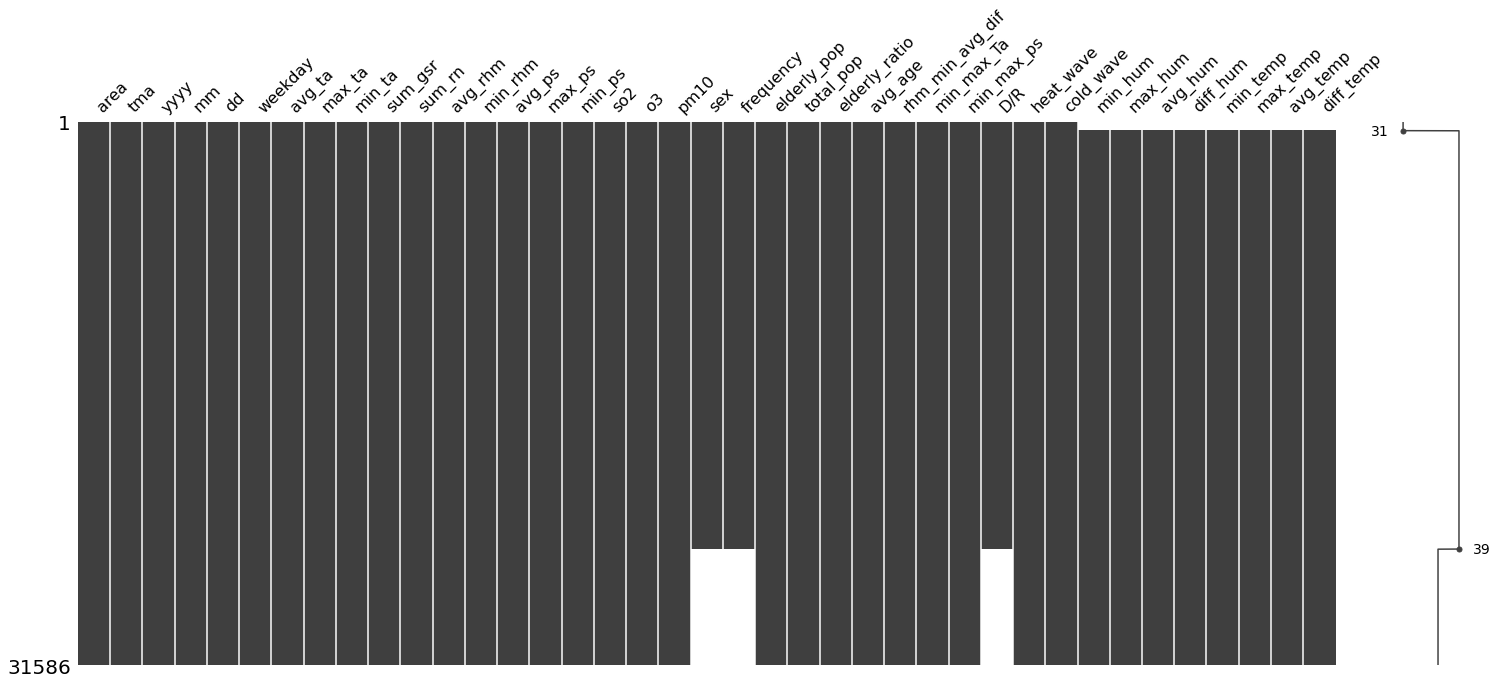

In [254]:
female = female_t.merge(tmp_hum, how='left', on=['area','tma','yyyy','mm','dd'])
female = female.merge(tmp_temp, how='left', on=['area','tma','yyyy','mm','dd'])

msno.matrix(female)

<AxesSubplot:>

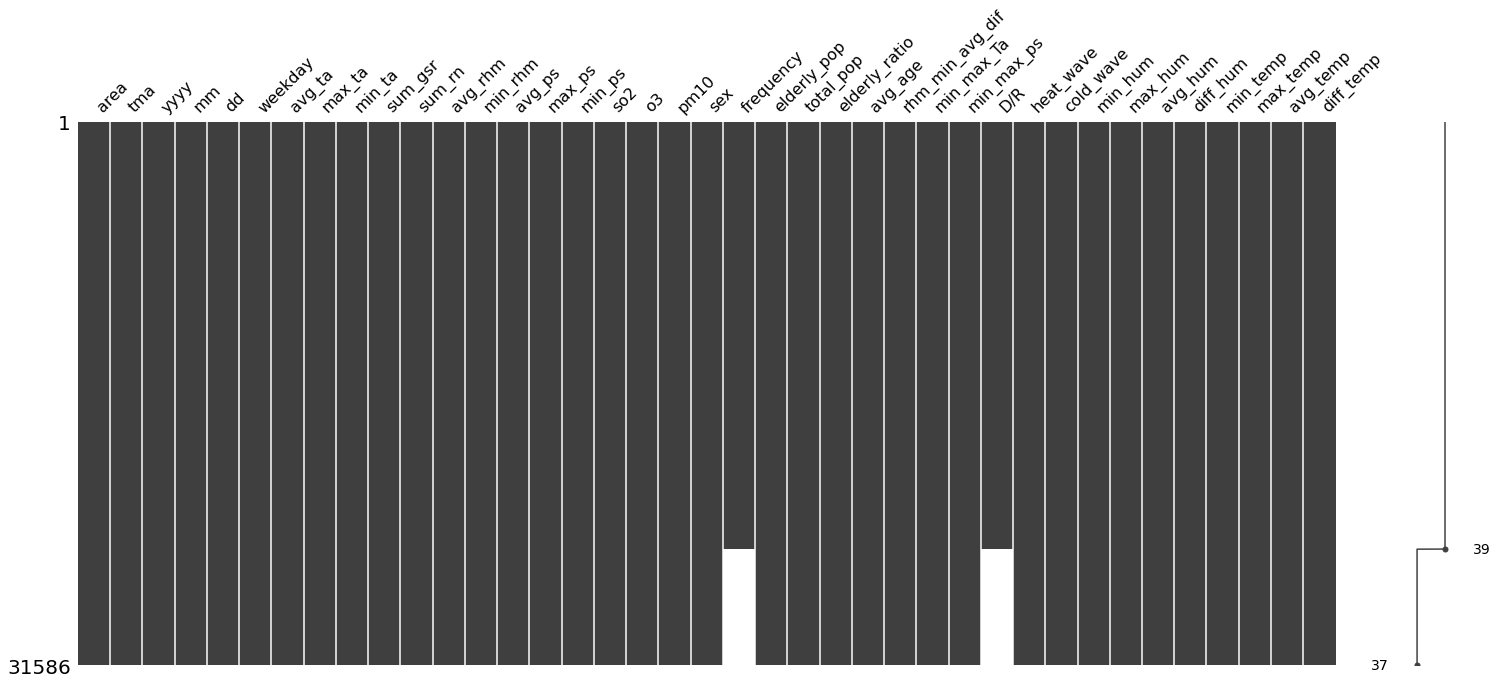

In [265]:
# 2011년도 데이터 결측치로 기존 관측치 데이터로 대체 (갯수 동일)
female.loc[female.yyyy == 2011, 'min_hum'] = female.loc[female.yyyy == 2011, 'min_rhm']
female.loc[female.yyyy == 2011, 'avg_hum'] = female.loc[female.yyyy == 2011, 'avg_rhm']
female.loc[female.yyyy == 2011, 'min_temp'] = female.loc[female.yyyy == 2011, 'min_ta']
female.loc[female.yyyy == 2011, 'max_temp'] = female.loc[female.yyyy == 2011, 'max_ta']
female.loc[female.yyyy == 2011, 'avg_temp'] = female.loc[female.yyyy == 2011, 'avg_ta']
female.loc[female.yyyy == 2011, 'diff_temp'] = female.loc[female.yyyy == 2011, 'min_max_Ta']

# max_hum, diff_hum 생성
female.loc[female.yyyy == 2011, 'max_hum'] = female.loc[female.yyyy == 2011, 'avg_rhm'] * 2 - female.loc[female.yyyy == 2011, 'min_rhm']
female.loc[(female.yyyy == 2011) & (female.max_hum > 100), 'max_hum'] = 100

female.loc[female.yyyy == 2011, 'diff_hum'] = female.loc[female.yyyy == 2011, 'max_hum'] - female.loc[female.yyyy == 2011, 'min_hum']

# 성별 컬럼 2 추가(2016년도 부분)
female['sex'] = 2

msno.matrix(female)

In [267]:
# 기존 컬럼 삭제
female_final = female.drop(columns = ['avg_ta', 'max_ta', 'min_ta', 'avg_rhm', 'min_rhm','rhm_min_avg_dif','min_max_Ta'])

# save data (heat_wave, cold_wave 추가 보완 예정 > 다른 파일에서)
female_final.to_csv('Z:/공모전/날씨빅데이터콘테스트(공유)/data/test/hospital_female_0801_test.csv', encoding='cp949', index=False)

male

<AxesSubplot:>

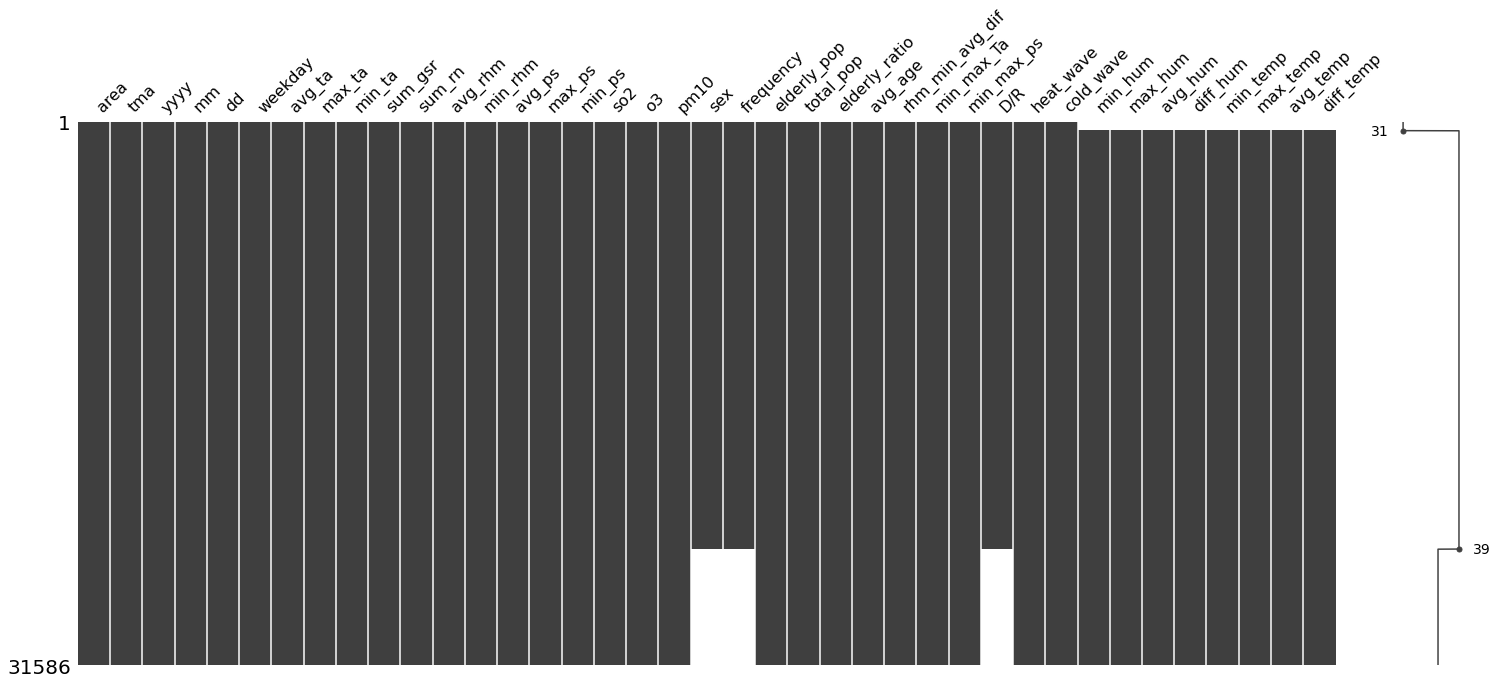

In [268]:
male = male_t.merge(tmp_hum, how='left', on=['area','tma','yyyy','mm','dd'])
male = male.merge(tmp_temp, how='left', on=['area','tma','yyyy','mm','dd'])

msno.matrix(male)

<AxesSubplot:>

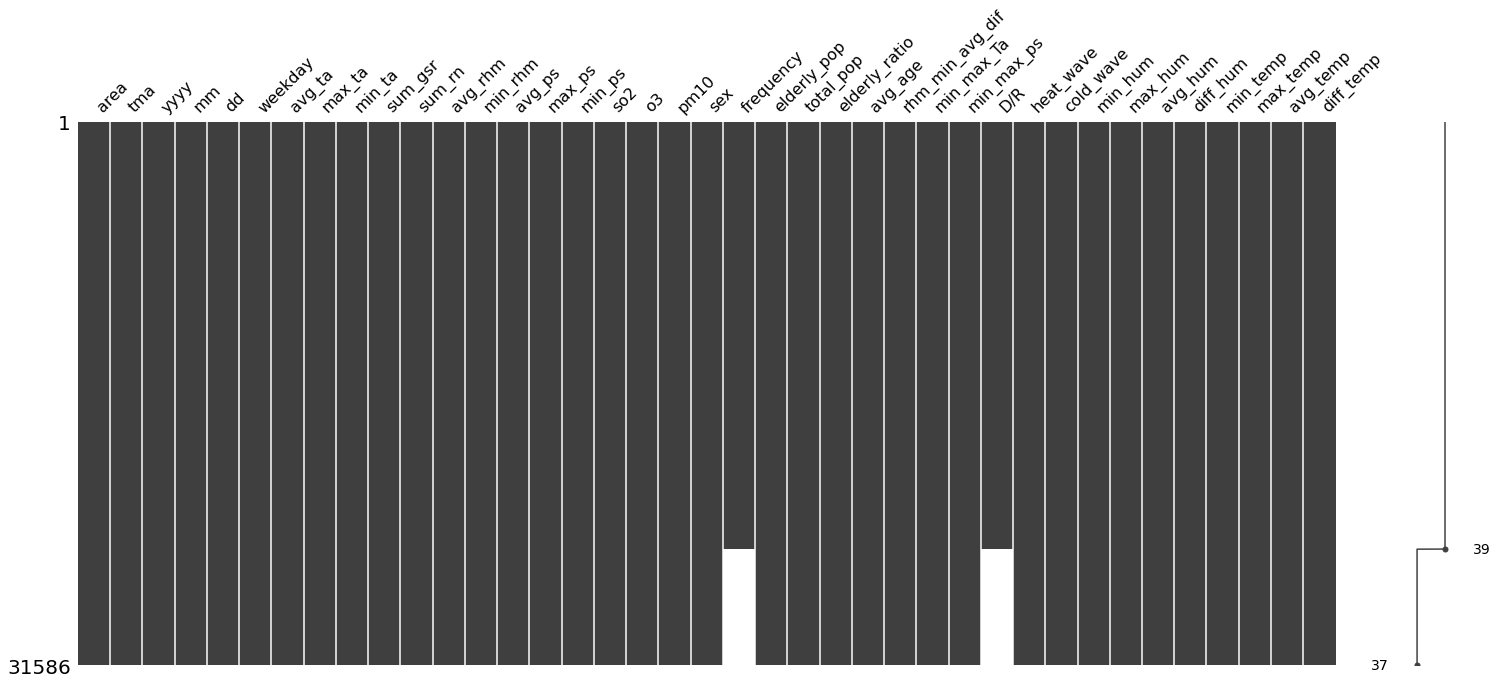

In [269]:
# 2011년도 데이터 결측치로 기존 관측치 데이터로 대체 (갯수 동일)
male.loc[male.yyyy == 2011, 'min_hum'] = male.loc[male.yyyy == 2011, 'min_rhm']
male.loc[male.yyyy == 2011, 'avg_hum'] = male.loc[male.yyyy == 2011, 'avg_rhm']
male.loc[male.yyyy == 2011, 'min_temp'] = male.loc[male.yyyy == 2011, 'min_ta']
male.loc[male.yyyy == 2011, 'max_temp'] = male.loc[male.yyyy == 2011, 'max_ta']
male.loc[male.yyyy == 2011, 'avg_temp'] = male.loc[male.yyyy == 2011, 'avg_ta']
male.loc[male.yyyy == 2011, 'diff_temp'] = male.loc[male.yyyy == 2011, 'min_max_Ta']

# max_hum, diff_hum 생성
male.loc[male.yyyy == 2011, 'max_hum'] = male.loc[male.yyyy == 2011, 'avg_rhm'] * 2 - male.loc[male.yyyy == 2011, 'min_rhm']
male.loc[(male.yyyy == 2011) & (male.max_hum > 100), 'max_hum'] = 100

male.loc[male.yyyy == 2011, 'diff_hum'] = male.loc[male.yyyy == 2011, 'max_hum'] - male.loc[male.yyyy == 2011, 'min_hum']

# 성별 컬럼 1 추가(2016년도 부분)
male['sex'] = 1

msno.matrix(male)

In [270]:
# 기존 컬럼 삭제
male_final = male.drop(columns = ['avg_ta', 'max_ta', 'min_ta', 'avg_rhm', 'min_rhm','rhm_min_avg_dif','min_max_Ta'])

# save data (heat_wave, cold_wave 추가 보완 예정 > 다른 파일에서)
male_final.to_csv('Z:/공모전/날씨빅데이터콘테스트(공유)/data/test/hospital_male_0801_test.csv', encoding='cp949', index=False)